In [5]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the dataset
data= pd.read_csv("computation capacity optimization problem - Sheet1.csv")

In [3]:
data

,timestamp,computation capacity being used,Total provisoned load
0,12:01:28 AM,6072,4000
1,12:01:29 AM,5697,4000
2,12:01:38 AM,5807,4000
3,12:03:24 AM,67,4000
4,12:05:12 AM,5895,4000
5,5:38:58 AM,1021,4000
6,5:38:59 AM,912,4000
7,9:25:37 AM,5989,4000
8,9:25:38 AM,2760,4000
9,1:55:00 PM,508,4000


In [7]:
#Reading all the columns
data.columns

Index(['timestamp', 'computation capacity being used',
       'Total provisoned load '],
      dtype='object')

In [8]:
#Creating a new column named as Difference 
# If difference>0 ---> High_traffic/ Peak_load
# If difference<0 ---> Idle Condition
data["Difference"]= data["computation capacity being used"]- data["Total provisoned load "]

In [9]:
data

,timestamp,computation capacity being used,Total provisoned load,Difference
0,12:01:28 AM,6072,4000,2072
1,12:01:29 AM,5697,4000,1697
2,12:01:38 AM,5807,4000,1807
3,12:03:24 AM,67,4000,-3933
4,12:05:12 AM,5895,4000,1895
5,5:38:58 AM,1021,4000,-2979
6,5:38:59 AM,912,4000,-3088
7,9:25:37 AM,5989,4000,1989
8,9:25:38 AM,2760,4000,-1240
9,1:55:00 PM,508,4000,-3492


In [24]:
# Converting 24 hour time format to 12 hour format
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%I:%M:%S %p').dt.strftime('%H:%M:%S')

In [28]:
data

,timestamp,computation capacity being used,Total provisoned load,Difference
0,00:01:28,6072,4000,2072
1,00:01:29,5697,4000,1697
2,00:01:38,5807,4000,1807
3,00:03:24,67,4000,-3933
4,00:05:12,5895,4000,1895
5,05:38:58,1021,4000,-2979
6,05:38:59,912,4000,-3088
7,09:25:37,5989,4000,1989
8,09:25:38,2760,4000,-1240
9,13:55:00,508,4000,-3492


In [34]:
# Extracting the first 2 character from the timestamp for determining the Time_Period
for i in range(len(data["timestamp"])):
    
    x= (data["timestamp"][i][i:2])
    

In [70]:
# Function f is use to assign different time period based on the time value
def f(x):
    if (x > "04") and (x <= "08"):
        return 'Early Morning'
    elif (x > "08") and (x <= "12"):
        return 'Morning'
    elif (x > "12") and (x <= "16"):
        return'Noon'
    elif (x > "16") and (x <= "20"):
        return 'Eve'
    #elif ()
    elif (x == "20") or (x == "23"):
        return 'Night'
    #elif (x=="23" ) and (x<="00"):
        #return 'Night'
    elif (x <= "04"):
        return'Late Night'

In [71]:
# Applying the function f on top of the data and adding another column (Time_Period)
data["Time_Period"]= data["timestamp"].apply(f)

In [87]:
#Creating a copy of the original data
data1 = data.copy()

In [90]:
data1["Time_Period"].replace({None: "Night"}, inplace=True)

In [91]:
data1

,timestamp,computation capacity being used,Total provisoned load,Difference,Time_Period
0,00:01:28,6072,4000,2072,Late Night
1,00:01:29,5697,4000,1697,Late Night
2,00:01:38,5807,4000,1807,Late Night
3,00:03:24,67,4000,-3933,Late Night
4,00:05:12,5895,4000,1895,Late Night
5,05:38:58,1021,4000,-2979,Early Morning
6,05:38:59,912,4000,-3088,Early Morning
7,09:25:37,5989,4000,1989,Morning
8,09:25:38,2760,4000,-1240,Morning
9,13:55:00,508,4000,-3492,Noon


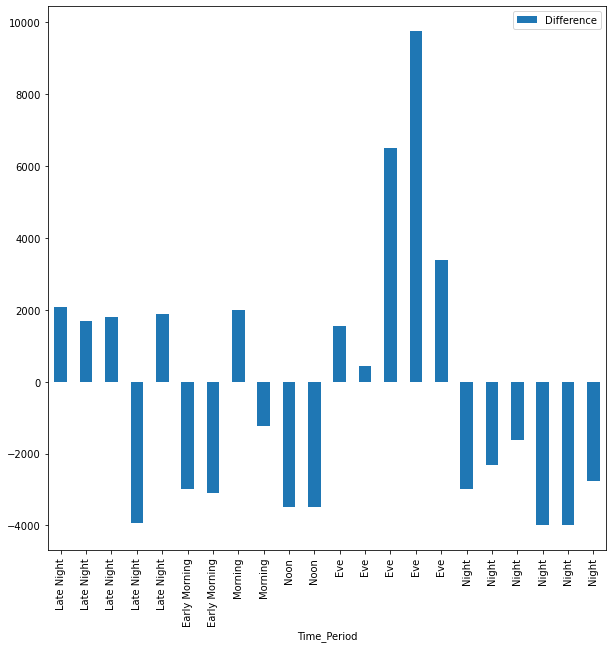

In [92]:
# Barplot to understand the load variation in different time period
data1.plot(x='Time_Period', y='Difference', kind='bar',figsize= (10,10)) 
plt.show()